In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [108]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0.5, 1.0, 'Heart Disease Prediction')

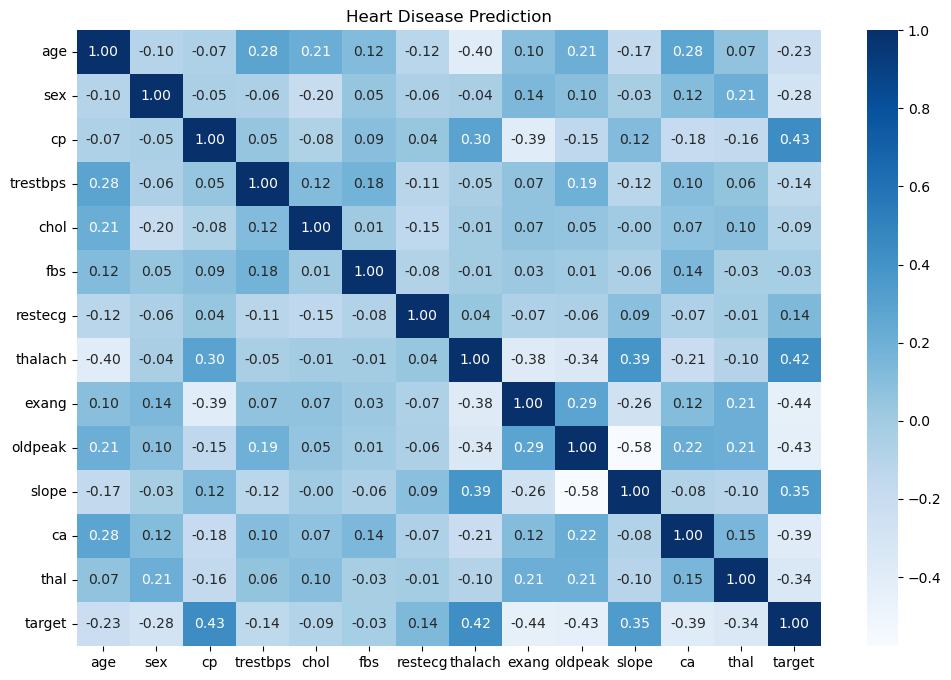

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt= '.2f' , cmap='Blues')
plt.title("Heart Disease Prediction")

In [114]:
X = df.drop('target' , axis = 1)
Y = df['target']

X_train , X_test , Y_train , Y_test = train_test_split(
    X ,Y , test_size = 0.2, random_state=42
)

scaler = StandardScaler()
X_trained_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [124]:
model = LogisticRegression()
model.fit(X_trained_scale , Y_train)

y_pred = model.predict(X_test_scale)
y_prob = model.predict_proba(X_test_scale)[:,1]

In [126]:
print ("Accuracy", accuracy_score(Y_test, y_pred))
print ("Precision", precision_score(Y_test, y_pred))
print ("Recall", recall_score(Y_test, y_pred))
print ("F1 score", f1_score(Y_test, y_pred))
print ("ROC AUC", roc_auc_score(Y_test, y_pred))

cm = confusion_matrix (Y_test, y_pred)
report = classification_report(Y_test, y_pred)
print ("confusion matrix",cm)
print("classification report" ,report) 

Accuracy 0.8524590163934426
Precision 0.8709677419354839
Recall 0.84375
F1 score 0.8571428571428571
ROC AUC 0.8529094827586207
confusion matrix [[25  4]
 [ 5 27]]
classification report               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



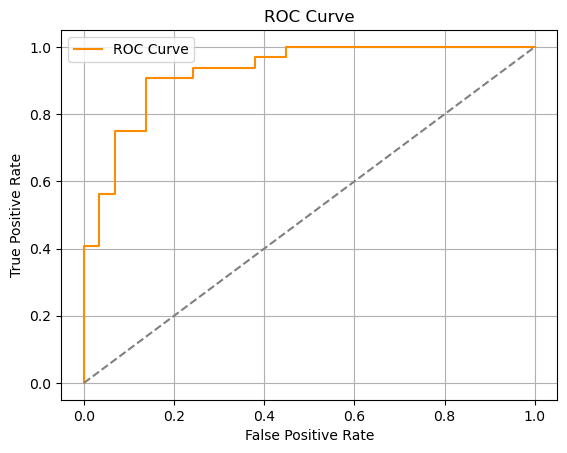

In [132]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()